In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
import warnings 
warnings.filterwarnings('ignore')

In [68]:
df=pd.read_csv("C:/Users/rasag/Downloads/happydata.csv")
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [69]:
df.isnull().any()

infoavail        False
housecost        False
schoolquality    False
policetrust      False
streetquality    False
ëvents           False
happy            False
dtype: bool

In [70]:
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [124]:
df.duplicated().sum()
data = df.copy()
print(df.columns)

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'events', 'happy'],
      dtype='object')


In [72]:
df.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


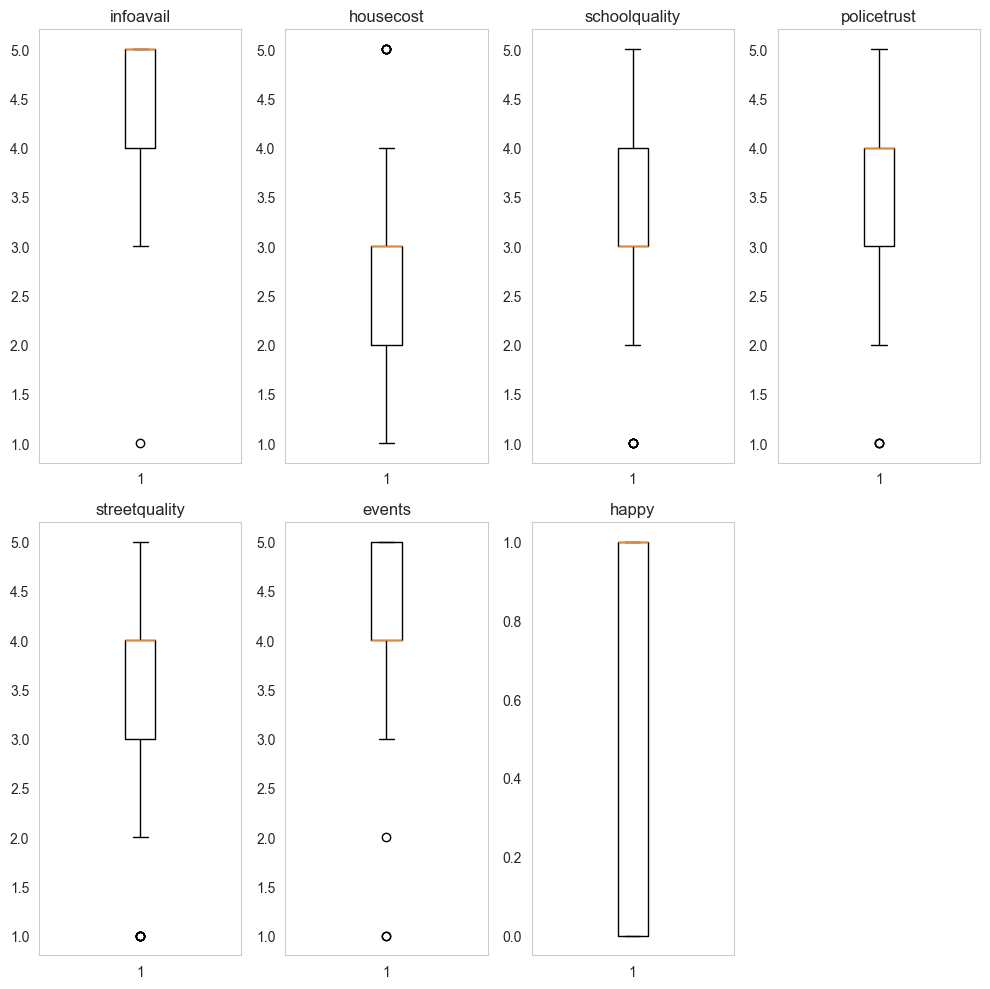

In [73]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
# Flatten the axes array to iterate over subplots
axes = axes.flatten()

categorical_cols = df.columns[df.dtypes == object]
numberic_cols = [x for x in df.columns if x not in categorical_cols]
# Plot boxplots for each column
for i, column in enumerate(numberic_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(numberic_cols), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
IQR = []
IQR.append(df["infoavail"].quantile(0.75) - df["infoavail"].quantile(0.25))
IQR


[1.0]

In [16]:
IQR.append(df["infoavail"].quantile(0.75)+1.5*IQR[0])
IQR

[1.0, 6.5]

In [17]:
IQR.append(df["infoavail"].quantile(0.25)-1.5*IQR[0])
IQR

[1.0, 6.5, 2.5]

In [18]:
df["infoavail"]=np.where(df["infoavail"]>6.5,6.5,np.where(df["infoavail"]<2.5,2.5, df["infoavail"]))

In [19]:
IQR=[]
IQR.append(df["housecost"].quantile(0.75)-df["housecost"].quantile(0.25))
IQR

[1.0]

In [20]:
upper=[]
IQR.append(df["housecost"].quantile(0.75)+1.5*IQR[0])
IQR

[1.0, 4.5]

In [21]:
lower=[]
IQR.append(df["housecost"].quantile(0.25)-1.5*IQR[0])
IQR

[1.0, 4.5, 0.5]

In [74]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,events,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


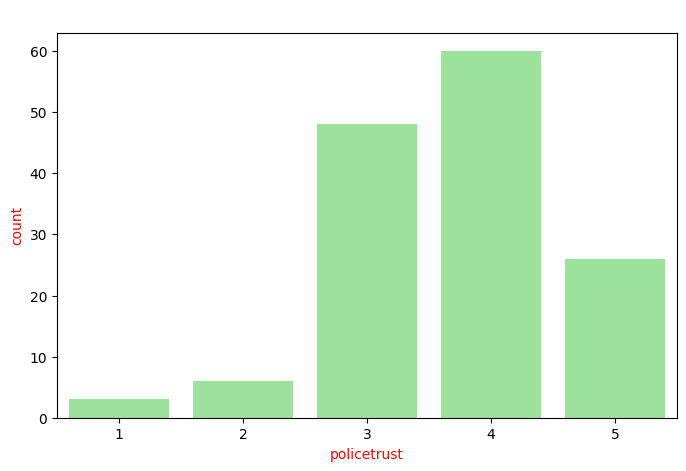

In [24]:
plt.figure(figsize=(8,5))
plt.grid(False)
plt.title(" ",color="red",fontsize=14)
plt.xlabel(None,color="red",fontsize=10)
plt.ylabel(None,color="red",fontsize=10)
sns.countplot(x=df["policetrust"],color="lightgreen");

Text(0.5, 1.0, 'The percentage of Happy and Unhapy')

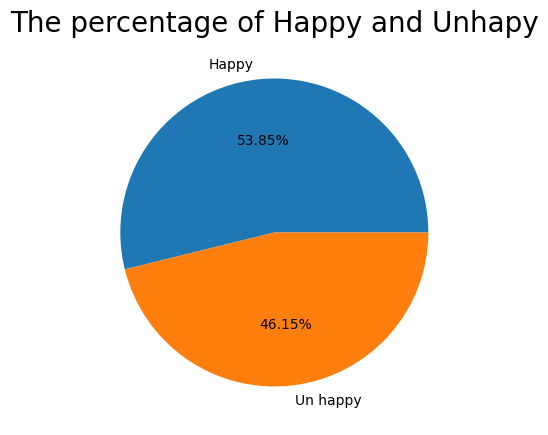

In [25]:
plt.figure(figsize=(10,5))
plt.pie(df.happy.value_counts().values,labels=["Happy","Un happy"],autopct="%1.2f%%")
plt.title("The percentage of Happy and Unhapy",color="black",size=20)

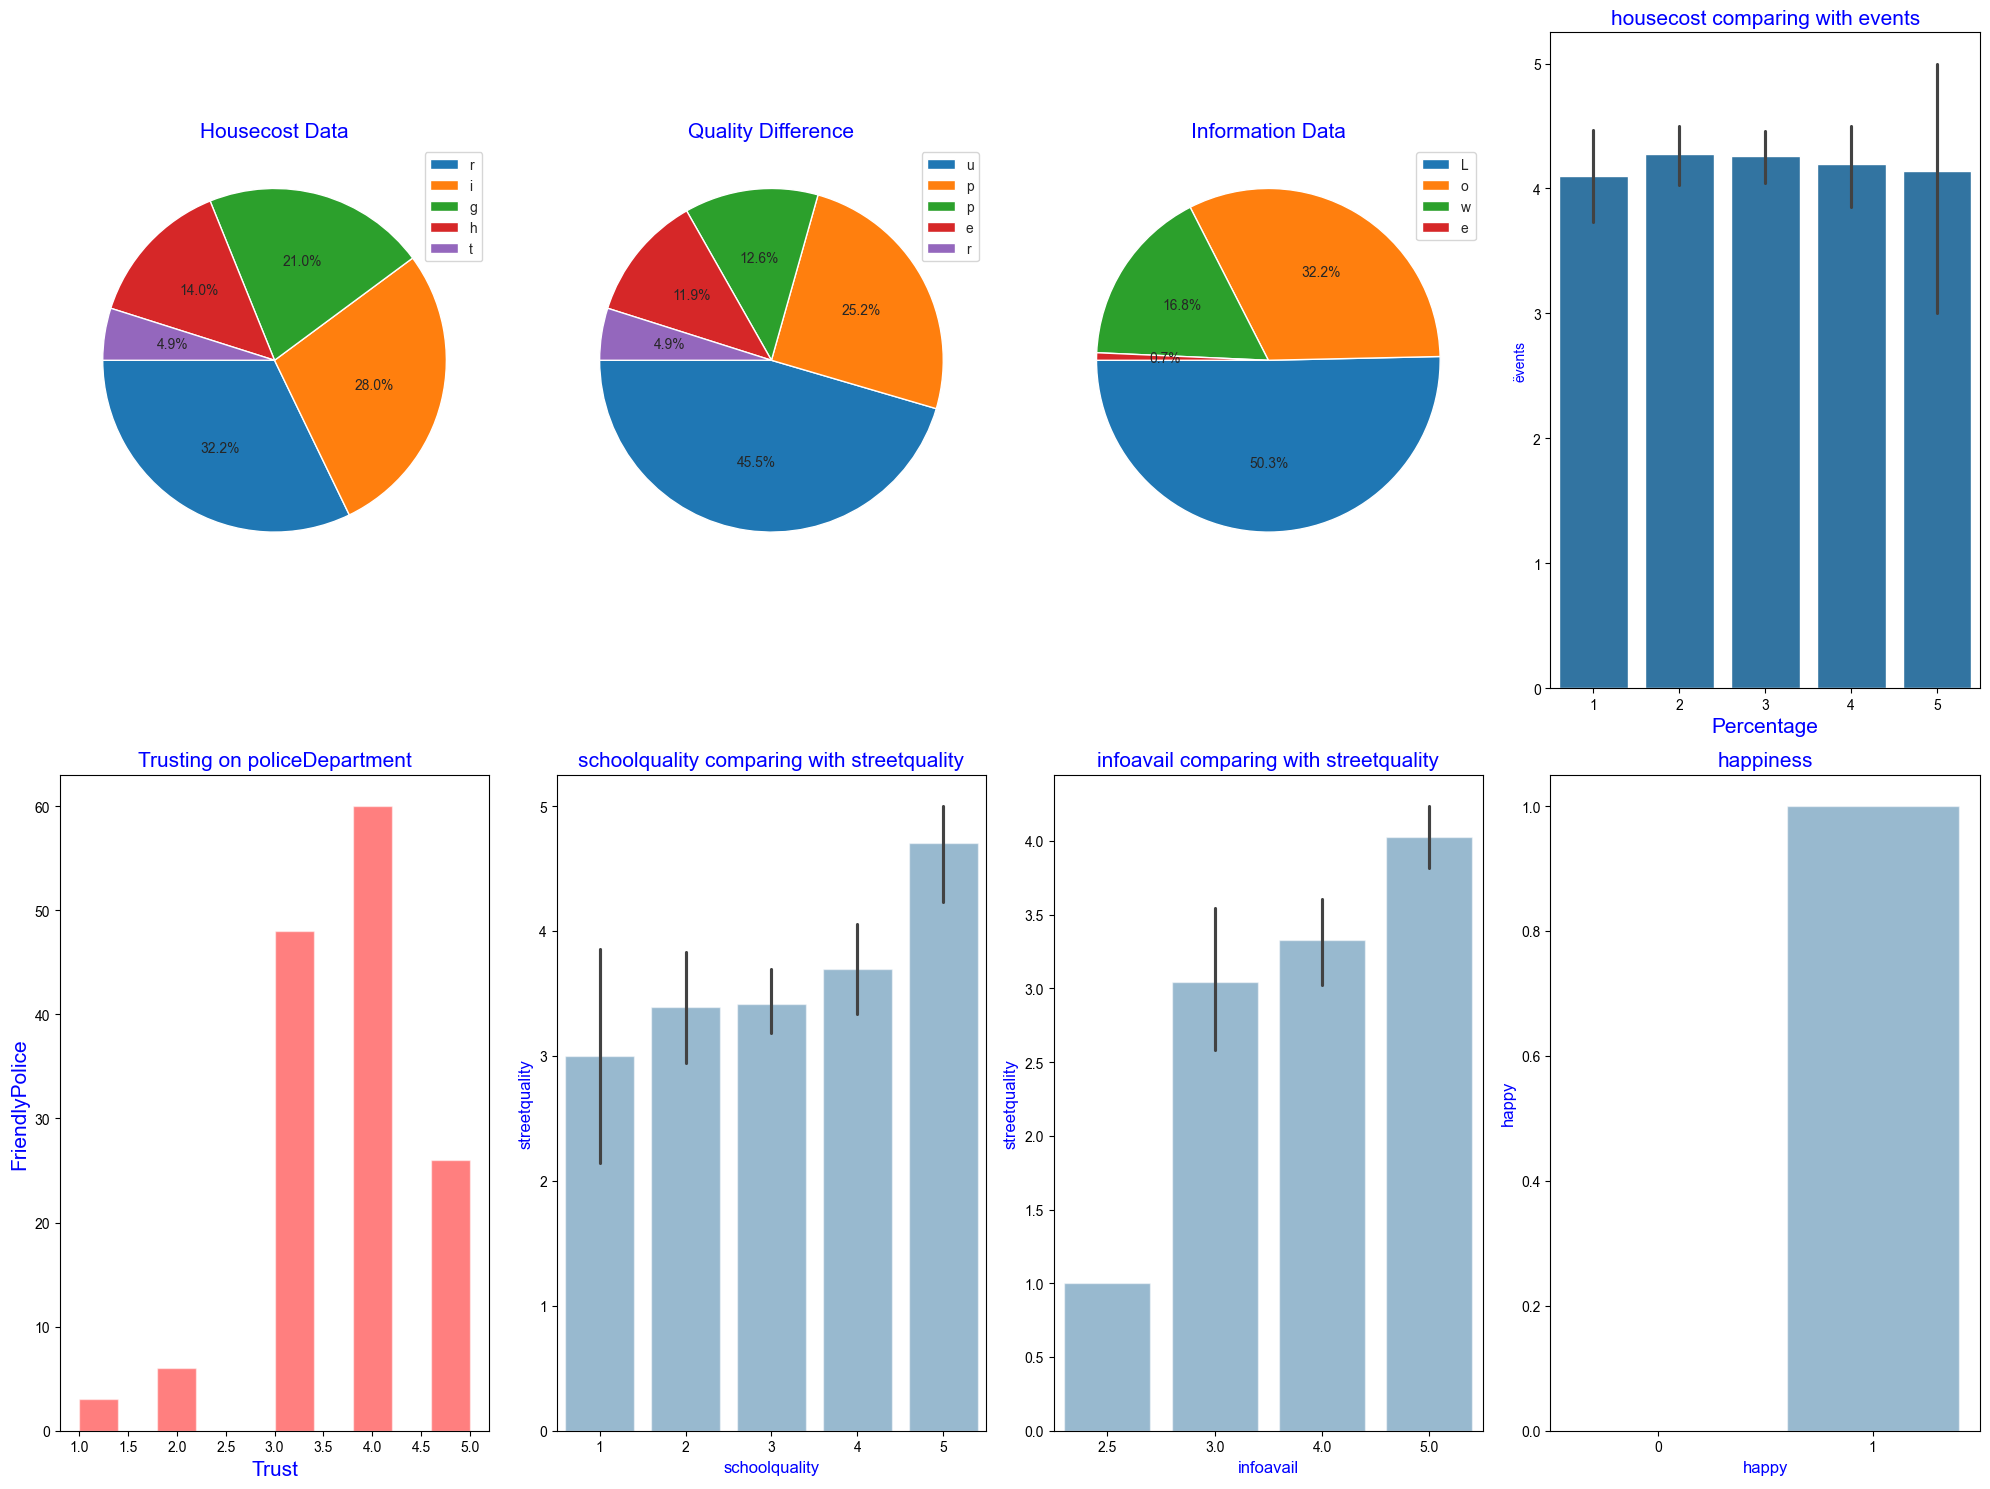

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
plt.tight_layout(pad=8)
plt.grid(False)
sns.set_style("whitegrid",{'axes.grid' : False})

axes[0, 0].set_title("Housecost Data", fontsize=15, color="blue")
axes[0, 0].pie(df.housecost.value_counts(), autopct="%1.1f%%", startangle=180)
axes[0, 0].legend("right")

axes[0, 3].set_xlabel("housecost", fontsize=15)
axes[0, 3].set_title("housecost comparing with events", fontsize=15, color="blue")
axes[0, 3].set_xlabel("Percentage", fontsize=15, color="blue")
axes[0, 3].set_ylabel(None, color='blue')
sns.barplot(x=df["housecost"], y=df["ëvents"], ax=axes[0, 3])

axes[1, 1].set_title('schoolquality comparing with streetquality', fontsize=15, color='blue')
axes[1, 1].set_xlabel('schoolquality', fontsize=12, color="blue")
axes[1, 1].set_ylabel('streetquality', fontsize=12, color="blue")
sns.barplot(x=df['schoolquality'], y=df['streetquality'], ax=axes[1, 1], alpha=0.5)

axes[0, 1].set_title("Quality Difference", fontsize=15, color="blue")
axes[0, 1].pie(df.schoolquality.value_counts(), autopct="%1.1f%%", startangle=180)
axes[0, 1].legend("upper right")

axes[1, 0].hist(df.policetrust, color='red', alpha=0.5)
axes[1, 0].set_title("Trusting on policeDepartment", fontsize=15, color='blue')
axes[1, 0].set_xlabel('Trust', fontsize=15, color="blue")
axes[1, 0].set_ylabel('FriendlyPolice', fontsize=15, color="blue")

axes[0, 2].set_title("Information Data", fontsize=15, color="blue")
axes[0, 2].pie(df.infoavail.value_counts(), autopct="%1.1f%%", startangle=180)
axes[0, 2].legend('Lower left')

axes[1, 2].set_title('infoavail comparing with streetquality', fontsize=15, color="blue")
axes[1, 2].set_xlabel('infoavail', fontsize=12, color="blue")
axes[1, 2].set_ylabel('', fontsize=12, color='blue')
sns.barplot(x=df["infoavail"], y=df['streetquality'], ax=axes[1, 2], alpha=0.5)

axes[1, 3].set_title('happiness', fontsize=15, color="blue")
axes[1, 3].set_xlabel('happy', fontsize=12, color="blue")
axes[1, 3].set_ylabel('', fontsize=12, color='blue')
sns.barplot(x=df["happy"], y=df['happy'], ax=axes[1, 3], alpha=0.5)  

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


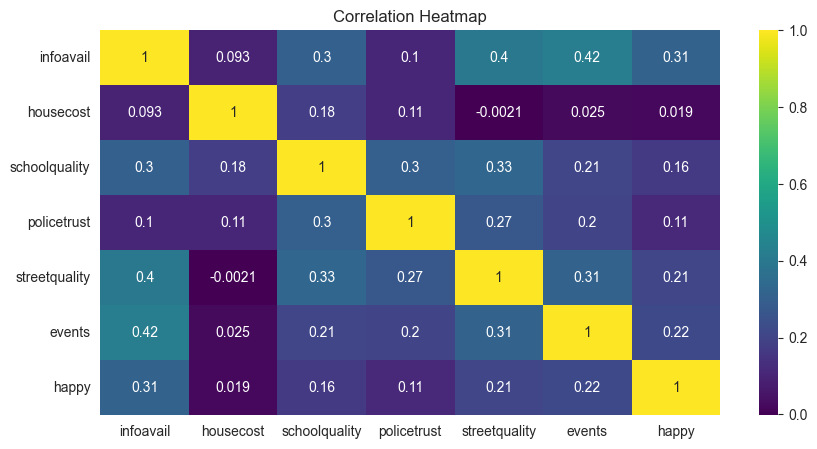

In [114]:
"""plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()"""
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='viridis')  # Change 'viridis' to your preferred color map
plt.title('Correlation Heatmap')
plt.show()

In [28]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [29]:
pip install StandardScaler

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [76]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame containing your dataset
# 'data' should have 143 rows and 7 columns, with the 7th column as the target labels

# Separate features and target labels
X = df.iloc[:, :-1]  # Features are all columns except the last one
y = df.iloc[:, -1]   # Target labels are in the last column

# Use SMOTE to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [78]:
pip install train_test_split

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement train_test_split (from versions: none)
ERROR: No matching distribution found for train_test_split

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
#print(df.keys())
x=df.drop('happy',axis=1)
y=df['happy']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=0)

In [115]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 0.85864493, -0.47224431,  0.78235901,  0.36734632, -1.36415184,
        -1.38675049],
       [ 0.85864493,  0.41031063, -0.21976377, -0.76447749,  1.30179062,
        -1.38675049],
       [-1.61946955,  1.29286556,  1.78448179,  0.36734632,  1.30179062,
        -0.21571674],
       [-0.38041231, -1.35479924, -0.21976377, -3.0281251 , -2.25279933,
        -0.21571674],
       [ 0.85864493,  0.41031063,  0.78235901,  1.49917013,  0.41314313,
         0.955317  ],
       [-1.61946955, -0.47224431, -0.21976377, -0.76447749, -1.36415184,
        -1.38675049],
       [ 0.85864493,  0.41031063, -0.21976377, -0.76447749,  1.30179062,
         0.955317  ],
       [ 0.85864493,  0.41031063, -1.22188654,  0.36734632,  0.41314313,
         0.955317  ],
       [-0.38041231, -1.35479924, -0.21976377,  0.36734632,  0.41314313,
        -1.38675049],
       [ 0.85864493, -1.35479924,  0.78235901, -0.76447749,  1.30179062,
         0.955317  ],
       [-1.61946955, -0.47224431, -0.21976377, -0.

In [99]:
sc_xdata=pd.DataFrame(x_train)
sc_xdata.head(10)

,0,1,2,3,4,5
0,0.858645,-0.472244,0.782359,0.367346,-1.364152,-1.386750
1,0.858645,0.410311,-0.219764,-0.764477,1.301791,-1.386750
2,-1.619470,1.292866,1.784482,0.367346,1.301791,-0.215717
3,-0.380412,-1.354799,-0.219764,-3.028125,-2.252799,-0.215717
4,0.858645,0.410311,0.782359,1.499170,0.413143,0.955317
5,-1.619470,-0.472244,-0.219764,-0.764477,-1.364152,-1.386750
6,0.858645,0.410311,-0.219764,-0.764477,1.301791,0.955317
7,0.858645,0.410311,-1.221887,0.367346,0.413143,0.955317
8,-0.380412,-1.354799,-0.219764,0.367346,0.413143,-1.386750
9,0.858645,-1.354799,0.782359,-0.764477,1.301791,0.955317


In [100]:
sc_ydata = pd.DataFrame(y_train, copy=True)
y_train.head(10)

124    1
31     0
98     0
36     1
16     0
10     0
93     1
111    1
42     0
118    1
Name: happy, dtype: int64

In [38]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features in X and labels in y
# Replace X and y with your actual feature and label data
x=df.drop('happy',axis=1)
y=df['happy']
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the classifier on the training data
dt.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("dt-train Accuracy:", train_accuracy)
print("dt-test accuracy:", test_accuracy)

print("dt-train precision:", train_precision)
print("dt-test precision:", test_precision)

print("dt-train recall:", train_recall)
print("dt-test recall:", test_recall)

print("dt-train f1score:", train_f1score)
print("dt-test f1score:", test_f1score)


dt-train Accuracy: 0.9649122807017544
dt-test accuracy: 0.5517241379310345
dt-train precision: 0.9656177251045956
dt-test precision: 0.5506792058516197
dt-train recall: 0.9649122807017544
dt-test recall: 0.5517241379310345
dt-train f1score: 0.964966697139872
dt-test f1score: 0.5452037617554859


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features in X and labels in y
# Replace X and y with your actual feature and label data
x=df.drop('happy',axis=1)
y=df['happy']
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
rf = RandomForestClassifier()

# Train the classifier on the training data
rf.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("rf-train Accuracy:", train_accuracy)
print("rf-test accuracy:", test_accuracy)

print("rf-train precision:", train_precision)
print("rf-test precision:", test_precision)

print("rf-train recall:", train_recall)
print("rf-test recall:", test_recall)

print("rf-train f1score:", train_f1score)
print("rf-test f1score:", test_f1score)


rf-train Accuracy: 0.9649122807017544
rf-test accuracy: 0.5517241379310345
rf-train precision: 0.96700706991359
rf-test precision: 0.5530377668308702
rf-train recall: 0.9649122807017544
rf-test recall: 0.5517241379310345
rf-train f1score: 0.9647360158638354
rf-test f1score: 0.5517241379310345


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features in X and labels in y
# Replace X and y with your actual feature and label data
x=df.drop('happy',axis=1)
y=df['happy']
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
knn = KNeighborsClassifier()

# Train the classifier on the training data
knn.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("knn-train Accuracy:", train_accuracy)
print("knn-test accuracy:", test_accuracy)

print("knn-train precision:", train_precision)
print("knn-test precision:", test_precision)

print("knn-train recall:", train_recall)
print("knn-test recall:", test_recall)

print("knn-train f1score:", train_f1score)
print("knn-test f1score:", test_f1score)


knn-train Accuracy: 0.9649122807017544
knn-test accuracy: 0.5517241379310345
knn-train precision: 0.96700706991359
knn-test precision: 0.5530377668308702
knn-train recall: 0.9649122807017544
knn-test recall: 0.5517241379310345
knn-train f1score: 0.9647360158638354
knn-test f1score: 0.5517241379310345


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features in X and labels in y
# Replace X and y with your actual feature and label data
x=df.drop('happy',axis=1)
y=df['happy']
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
svc = SVC()

# Train the classifier on the training data
svc.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("svc-train Accuracy:", train_accuracy)
print("svc-test accuracy:", test_accuracy)

print("svc-train precision:", train_precision)
print("svc-test precision:", test_precision)

print("svc-train recall:", train_recall)
print("svc-test recall:", test_recall)

print("svc-train f1score:", train_f1score)
print("svc-test f1score:", test_f1score)


svc-train Accuracy: 0.9649122807017544
svc-test accuracy: 0.5862068965517241
svc-train precision: 0.9653639593489217
svc-test precision: 0.5862068965517241
svc-train recall: 0.9649122807017544
svc-test recall: 0.5862068965517241
svc-train f1score: 0.9648355263157895
svc-test f1score: 0.5862068965517241


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features in X and labels in y
# Replace X and y with your actual feature and label data
x=df.drop('happy',axis=1)
y=df['happy']
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
log = LogisticRegression()

# Train the classifier on the training data
log.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("log-train Accuracy:", train_accuracy)
print("log-test accuracy:", test_accuracy)

print("log-train precision:", train_precision)
print("log-test precision:", test_precision)

print("log-train recall:", train_recall)
print("log-test recall:", test_recall)

print("log-train f1score:", train_f1score)
print("log-test f1score:", test_f1score)


log-train Accuracy: 0.9649122807017544
log-test accuracy: 0.5862068965517241
log-train precision: 0.9653639593489217
log-test precision: 0.5862068965517241
log-train recall: 0.9649122807017544
log-test recall: 0.5862068965517241
log-train f1score: 0.9648355263157895
log-test f1score: 0.5862068965517241


In [113]:
input_data=np.array([5,1,2,5,2,4]).reshape(1,-1)
rf.predict(sc.transform(input_data))

array([0], dtype=int64)

In [112]:
log.predict(sc.transform([[5,1,2,5,2,4]]))

array([0], dtype=int64)

In [47]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import xgboost as xgb


In [96]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features in X and labels in y
# Replace X and y with your actual feature and label data
x=df.drop('happy',axis=1)
y=df['happy']

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of XGBClassifier
xgboost_model = xgb.XGBClassifier()

# Train the classifier on the training data
xgboost_model.fit(x_train, y_train)

# Make predictions on the training and test sets
y_train_pred = xgboost_model.predict(x_train)
y_test_pred = xgboost_model.predict(x_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1score = f1_score(y_train, y_train_pred, average='weighted')

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("xgboost-train Accuracy:", train_accuracy)
print("xgboost-test accuracy:", test_accuracy)

print("xgboost-train precision:", train_precision)
print("xgboost-test precision:", test_precision)

print("xgboost-train recall:", train_recall)
print("xgboost-test recall:", test_recall)

print("xgboost-train f1score:", train_f1score)
print("xgboost-test f1score:", test_f1score)


xgboost-train Accuracy: 0.9385964912280702
xgboost-test accuracy: 0.5862068965517241
xgboost-train precision: 0.9386184210526316
xgboost-test precision: 0.5862068965517241
xgboost-train recall: 0.9385964912280702
xgboost-test recall: 0.5862068965517241
xgboost-train f1score: 0.9385342595593998
xgboost-test f1score: 0.5862068965517241


In [95]:
y_train_xgb=np.where(y_train=='yes',1,0)

In [93]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have your features in X and labels in y
# Replace X and y with your actual feature and label data
x=df.drop('happy',axis=1)
y=df['happy']

# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an instance of XGBClassifier
xgboost_model = xgb.XGBClassifier()

# Train the classifier on the training data
xgboost_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(x_test)
y_pred

# Now you can use y_pred as your predicted labels



array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0])

In [94]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5862068965517241


In [91]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[25,50,100,150],
    'max_features':['sqrt','log2',None],
    'max_depth':[3,6,9],
    'max_leaf_nodes':[3,6,9],
}

In [90]:
rf_classifier=RandomForestClassifier()
rf_grid=GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=10,
    verbose=2,
    n_jobs=-1
)
print(rf_grid)


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=2)


In [88]:
rf_grid.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]},
             verbose=2)

In [89]:
print("Best Parameters:",rf_grid.best_params_)
print("Best Score:",rf_grid.best_score_)

Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 50}
Best Score: 0.6666666666666667


In [57]:
import pickle

In [58]:
filename='happydata.pkl'
pickle.dump(rf,open(filename,'wb'))

In [59]:
pickle.dump(sc,open('happydata_sc.pkl','wb'))